## Homework 6

**Complete the coding questions in this notebook, and use your results to answer *Lab Homework 6* on bCourses**

For this homework we will be using the data: "Ctrip.csv" and "YelpRD.csv". Be sure to load those files on Jupyter.

**Bold text is the actual Homework Quiz question.**

----

In [16]:
# Load packages
  library(ggplot2)
  library(dplyr)

In [17]:
# Load the data

Ctrip <- read.csv('Ctrip.csv')

Yelp <- read.csv('YelpRD.csv')


## Part 1: Differences in differences

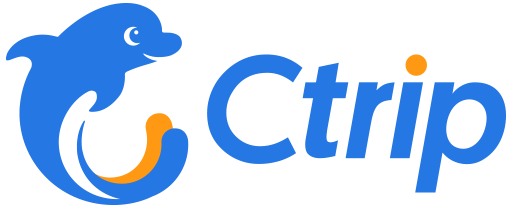

In this question you will analyze HR data from Ctrip, China's largest travel agency. At the time of the study (2010), the company had 16,000 employees and a $7 billion valuation.

Ctrip is considering allowing their call center employees to Work From Home (WFH). Allowing employees to WFH will reduce office expenses and potentially increase employee retention by making Ctrip a more attractive place to work. However, Ctrip is worried that employees may not work as hard at home, reducing productivity. To better understand what impact this policy has on productivity, Ctrip decides to conduct an analysis comparing employees that choose to WFH and employees that choose not to.

The data come from Ctrip's airfare and hotel departments in Shanghai. These departments take calls from customers and make bookings. Employees typically work 5 shifts a week in teams of about 15 people, plus a manager.

In order to qualify for WFH, employees must have their own room, broadband internet, and 6+ months of experience in their current position. Ctrip asks qualified employees if they want to WFH.

### Who Chooses to Work from Home?

You will compare workers that *chose* to work from home to those that *chose* to work at the office. Run the cell below to read in the data.

In [18]:
#show Ctrip data
head(Ctrip)

,personid,post,performance,age,tenure,grosswage,children,bedroom,commute,men,married,wfh
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<int>,<int>,<int>
1,3906,0,0.0845730080,33,96,2.737547,1,yes,180,0,1,1
2,3906,1,0.2828962800,33,96,2.737547,1,yes,180,0,1,1
3,4122,0,0.0004498826,30,94,4.096246,0,no,180,0,0,1
4,4122,1,0.7382376200,30,94,4.096246,0,no,180,0,0,1
5,4942,0,0.9185097800,27,82,5.295395,0,yes,160,0,1,1
6,4942,1,-0.2537054400,27,82,5.295395,0,yes,160,0,1,1


Each row corresponds to a specific employee, indexed by `personid`, in one of two periods. Below are descriptions of the variables that are included in the data.

- `post`: indicator for whether row refers to period after WFH option is introduced. `post` == 0 refers to 46 weeks before Ctrip introduces a WFH option. `post` == 1 refers to 46 weeks after Ctrip introduces a WFH option.

- `performance`: employee performance metric summarizes a variety of performance metrics, including the number of phone calls an employee answers, the number of orders taken, and the number of reservation phone calls made. `performance` is scaled to have mean 0 and standard deviation 1 across employees (this includes some employees from other offices that are not included in our data) in `post` == 0.

- `wfh`: Whether the employee Works From Home. This takes a value of 1 for employees that WFH, and 0 for employees that work from the office.

- `age`: Employee age
   
- `grosswage`: Gross wage (1000 Yuan)
   
- `children`: An indicator for whether the employee has children

- `married`: An indicator for whether the employee is married
   
- `commute`: Commute time to and from the office recorded in minutes

- `men`: indicator for whether employee is a man

**Using only data from the pre-period (where `post` == 0)**, calculate and compare averages of each characteristic for workers that choose to WFH to those that choose to work in the office.

**Q1: How would you characterize differences in commute times?**

(a) Those that choose to WFH have longer commutes, but the difference *is not* statistically sigificant.

(b) Those that choose to WFH have longer commutes, and the difference *is* statistically sigificant.

(c) Those that choose to work in the office have longer commutes, but the difference *is not* statistically sigificant.

(d) Those that choose to work in the office have longer commutes, and the difference *is* statistically sigificant.

In [19]:
means = Ctrip%>% filter(post=="0")
summary(lm(commute~wfh, data = means))
print("WFH = longer commute, high p value, .01, b")


Call:
lm(formula = commute ~ wfh, data = means)

Residuals:
   Min     1Q Median     3Q    Max 
-82.62 -44.62  -4.62  35.38 215.38 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   84.620      4.480  18.889   <2e-16 ***
wfh           17.326      6.757   2.564   0.0108 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.89 on 296 degrees of freedom
Multiple R-squared:  0.02173,	Adjusted R-squared:  0.01843 
F-statistic: 6.576 on 1 and 296 DF,  p-value: 0.01083


[1] "WFH = longer commute, high p value, .01, b"


*Calculate mean **performance** for each of the following four cases:*

- Pre-policy (not WFH)
- Post-policy (not WFH)
- Pre-policy (WFH)
- Post-policy (WFH)

**Q2. What is the time trend for the group that DID NOT choose to WFH? In other words, calculate Post-policy (not WFH)-Pre-policy (not WFH). Round to 2 decimal places. If your answer is negative, don't forget a "-" sign.**

In [20]:
no_wfh = Ctrip %>% group_by(post, wfh) %>% summarize("perf" = mean(performance))
no_wfh

no_wfh[3,3]-no_wfh[1,3]

`summarise()` has grouped output by 'post'. You can override using the
`.groups` argument.


post,wfh,perf
<int>,<int>,<dbl>
0,0,-0.10654387
0,1,-0.02845020
1,0,-0.50915178
1,1,-0.05136435


perf
<dbl>
-0.4026079


**Q3. What is the time trend for the group that DID choose to WFH? In other words, calculate Post-policy (WFH)- Pre-policy (WFH). Round to 2 decimal places. If your answer is negative, don't forget a "-" sign.**

In [21]:
no_wfh[4,3]-no_wfh[2,3]

perf
<dbl>
-0.02291415


Now use a difference-in-difference regression model to estimate the effect of WFH on performance (as we did in lab looking at the Yelp ban policy).

**Q4. What is the estimated treatment effect (e.g., the impact WFH on performance)? Report your answer to 2 decimal places.**

In [22]:
did_model = lm(performance~post+wfh+post*wfh, data = Ctrip)
summary(did_model)
print("Treatment effect: .08")


Call:
lm(formula = performance ~ post + wfh + post * wfh, data = Ctrip)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2400 -0.5089 -0.0249  0.4647  2.2569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.10654    0.05663  -1.881  0.06040 .  
post        -0.40261    0.08008  -5.027  6.6e-07 ***
wfh          0.07809    0.08541   0.914  0.36091    
post:wfh     0.37969    0.12079   3.143  0.00175 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7318 on 592 degrees of freedom
Multiple R-squared:  0.07067,	Adjusted R-squared:  0.06596 
F-statistic: 15.01 on 3 and 592 DF,  p-value: 1.997e-09


[1] "Treatment effect: .08"


**Q5. What is the p-value on the estimated treatment effect? Report your answer to 3 decimal places.**

In [23]:
print("P-value: .361")

[1] "P-value: .361"


## Part 2: Regression discontinuity

We're (once again) going to use the thresholds in Yelp star ratings to identify the causal effect of ratings on consumer behavior.

However, our **outcome** has changed - we will now focus on the availability **at 8pm** (not 7pm as in the lab):

**`avail_8pm`**: The **average** availability of a restaurant at 8pm.

- Remember: restaurants want *less* availability.

Here is a reminder of the other relevant variables:

**Running variable (which defines treatment):** 

* `avg_rating`: the average restaurant rating from 0 to 5.

**Treatment:** 

- `display_rating`: The restaurants **displayed** rating (using rounded 0.5 star increments).

**Other variables:**

* `price`: price category of restaurant ($ \$, \; \$\$, \; \$ \$ \$, \; \$ \$ \$ \$ $)

Run the following regression:

$$\text{avail}\_\text{8pm}_{i} = \beta_{0} + \beta_{1} \text{cross}_{i} + \beta_{2} (\text{avg}\_\text{rating}_{i} - 3.75) + \beta_{3} (\text{avg}\_\text{rating}_{i} - 3.75) \times \text{cross}_{i}   + e_{i}$$

Restrict your regression to the following bandwidths (this will involve running 3 separate regressions):

Model 1: $\pm 0.5$ of 3.75 = 3.25 to 4.25 

Model 2: $\pm 0.4$ of 3.75 = 3.35 to 4.15 

Model 3: $\pm 0.2$ of 3.75 = 3.55 to 3.95 

**Q6. What is the coefficient estimate on the treatment effect in Model 1? Remember to generate an indicator for crossing the threshold, as we did in lab. Round to 2 decimal places. Don't forget a negative sign!**

In [27]:
Yelp_adj = Yelp %>% mutate(cross = ifelse(avg_rating >=3.75,1,0))%>% 
mutate(avg_rating_adj = avg_rating-3.75)

model = lm(avail_8pm~cross+avg_rating_adj+cross*avg_rating_adj, data=Yelp_adj%>%filter(avg_rating>=3.25 &avg_rating<=4.25))

summary(model)

model2 = lm(avail_8pm~cross+avg_rating_adj+cross*avg_rating_adj, data=Yelp_adj%>%filter(avg_rating>=3.35 &avg_rating<=4.15))

summary(model2)

model3 = lm(avail_8pm~cross+avg_rating_adj+cross*avg_rating_adj, data=Yelp_adj%>%filter(avg_rating>=3.55 &avg_rating<=3.95))

summary(model3)


Call:
lm(formula = avail_8pm ~ cross + avg_rating_adj + cross * avg_rating_adj, 
    data = Yelp_adj %>% filter(avg_rating >= 3.25 & avg_rating <= 
        4.25))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7564 -0.5712  0.2539  0.2695  0.5001 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.75653    0.01156  65.438  < 2e-16 ***
cross                -0.11339    0.01659  -6.837 8.52e-12 ***
avg_rating_adj        0.05293    0.04231   1.251    0.211    
cross:avg_rating_adj -0.34072    0.06533  -5.216 1.86e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4604 on 11633 degrees of freedom
Multiple R-squared:  0.03082,	Adjusted R-squared:  0.03057 
F-statistic: 123.3 on 3 and 11633 DF,  p-value: < 2.2e-16



Call:
lm(formula = avail_8pm ~ cross + avg_rating_adj + cross * avg_rating_adj, 
    data = Yelp_adj %>% filter(avg_rating >= 3.35 & avg_rating <= 
        4.15))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7897 -0.5773  0.2387  0.3714  0.4550 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.72511    0.01263  57.393  < 2e-16 ***
cross                -0.09328    0.01770  -5.270 1.39e-07 ***
avg_rating_adj       -0.16156    0.05422  -2.980  0.00289 ** 
cross:avg_rating_adj -0.05656    0.07910  -0.715  0.47463    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4568 on 10322 degrees of freedom
Multiple R-squared:  0.03357,	Adjusted R-squared:  0.03329 
F-statistic: 119.5 on 3 and 10322 DF,  p-value: < 2.2e-16



Call:
lm(formula = avail_8pm ~ cross + avg_rating_adj + cross * avg_rating_adj, 
    data = Yelp_adj %>% filter(avg_rating >= 3.55 & avg_rating <= 
        3.95))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7927 -0.5982  0.2533  0.3277  0.4416 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.67557    0.01838  36.756  < 2e-16 ***
cross                -0.11722    0.02526  -4.641 3.55e-06 ***
avg_rating_adj       -0.58621    0.14560  -4.026 5.75e-05 ***
cross:avg_rating_adj  1.31726    0.21347   6.171 7.27e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4592 on 5594 degrees of freedom
Multiple R-squared:  0.02143,	Adjusted R-squared:  0.0209 
F-statistic: 40.83 on 3 and 5594 DF,  p-value: < 2.2e-16


**Q7.  Which model (Model 1, 2, or 3) has the largest (most negative) treatment effect?**

(a) $\pm 0.5$ (Model 1)

(b) $\pm 0.4$ (Model 2)

(c) $\pm 0.2$ (Model 3)

**Q8. What is the p-value on the treatment effect ($b_{1}$) from the model you selected in the previous question?**

**Q9. Which model (1, 2, or 3) has the smallest p-value on the treatment effect ($b_{1}$)?**

(a) $\pm 0.5$ (Model 1) 

(b) $\pm 0.4$ (Model 2)

(c) $\pm 0.2$ (Model 3)

**Q10. Which scenario best fits your responses in the last 3 questions?**

(a) The model with the lowest p-value on the treatment effect also has the largest (most negative) treatment effect.

(b) The model with the lowest p-value on the treatment effect is NOT the model with the largest (most negative) treatment effect. This is because the model with the largest treatment effect has lower bandwidth (and so a smaller sample size).

(c) The model with the lowest p-value on the treatment effect IS the model with the largest (most negative) treatment effect. This is because the model with the largest treatment effect has lower bandwidth (and so a smaller sample size).

**Q11. Compare the three 8pm models you just estimated to the three 7pm models we looked at in lab. What general trend do you observe?**

(a) In the homework results (looking at 8pm availability), having 4 (vs 3.5) stars has a SMALLER impact (coefficients closer to 0) on restaurant availability than in the model from lab looking at 7pm availability. 

(b) In the homework results (looking at 8pm availability), having 4 (vs 3.5) stars has a LARGER impact (coefficients closer to 0) on restaurant availability than in the model from lab looking at 7pm availability.

In [25]:
print("6: -.11")
print("7: c")
print("8: 0")
print("9: a")
print("10: b")
print("11: a")

[1] "6: 2.46"
[1] "7: c"
[1] "8: 2.9e-10"
[1] "9: a"
[1] "10: a"
[1] "11: a"
